<a href="https://colab.research.google.com/github/hieu1999210/Some-experiments-with-CNN/blob/master/experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Four experiments of CNN with mnist data set:

1) random scaling and random location

2) random scaling and random location with gaussian noise

3) random scaling and random location and permuting

4) random scaling and random location and permuting with gaussian noise

# Load and preprocess data

Note: 

    there are four preprocess procedure for each experiment    
    run only one procedure for each experiment
    

In [1]:
import matplotlib.pyplot as plt
% matplotlib inline

import imgaug.augmenters as iaa
import numpy as np
import tensorflow as tf

from keras.datasets import mnist
from keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, AveragePooling2D

from keras.regularizers import l2
from keras.utils import np_utils
from keras import backend as K

from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [0]:
# load mnist data set

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
def augment(images, output_size=192, resize_scale = (.8,2.5), add_noise = True,
            gauss_var=0.3,):
    """
    resize, pad and add gauss noise to image (no stretching)
    """
    size = output_size

    processed_imgs = []
    
    aug = iaa.Resize(resize_scale)

    for image in images:
        # print(image.shape)
        img = aug(images = image)
        current_size = img.shape[0]

        # generate pad size for top and left
        pad_w_size = np.random.randint((size - current_size)//2)
        pad_h_size = np.random.randint((size - current_size)//2)

        # pad
        img = np.pad(img, ((pad_w_size, (size - current_size - pad_w_size)), 
                            (pad_h_size, (size - current_size - pad_h_size))),
                    'constant', constant_values = (0,))
        assert img.shape == (size, size)

        processed_imgs.append(img)

    # add gauss noise
    if add_noise:
        noise = iaa.AdditiveGaussianNoise(scale=gauss_var*255)
        processed_imgs = noise(images = processed_imgs)

    return np.array(processed_imgs)

In [0]:
def permute_pixels(images, seed = 0):
    """
    permute pixels with same arrangement for all images
    """
    length, width = images[0].shape
    pixel_num = length*width
    arr = np.arange(pixel_num)

    np.random.seed(seed)
    np.random.shuffle(arr)
    permuted_imgs = []

    for img in images:
        
        flatten = img.reshape((pixel_num,))
        flatten = flatten[arr]
        shuffled_img = flatten.reshape((length, width))
        permuted_imgs.append(shuffled_img)

    return np.array(permuted_imgs)

In [0]:
# show image

def show_img(img, label):
    """
    show image
    """
    plt.figure(dpi=150)
    plt.title("label: " + str(label))
    fig = plt.imshow(img)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.show()

## preprocess data for experiement 1:
    random scaling and random location

In [0]:
## preprocess data for experiement 1

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = augment(X_train, add_noise=False)
X_test = augment(X_test, add_noise=False)


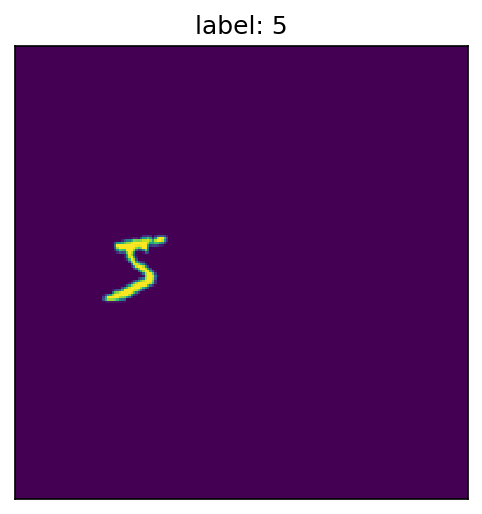

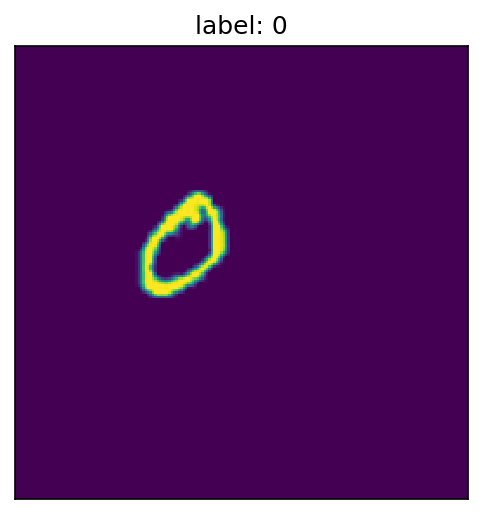

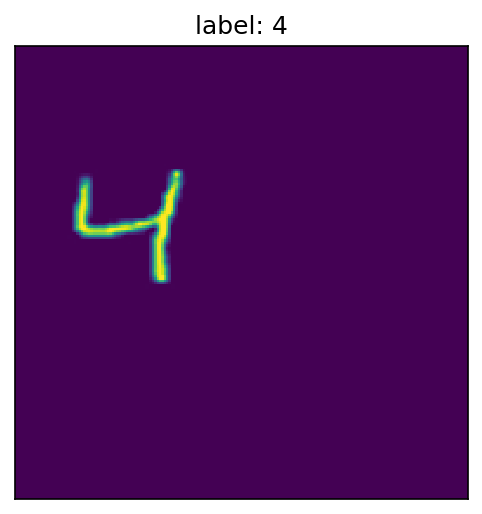

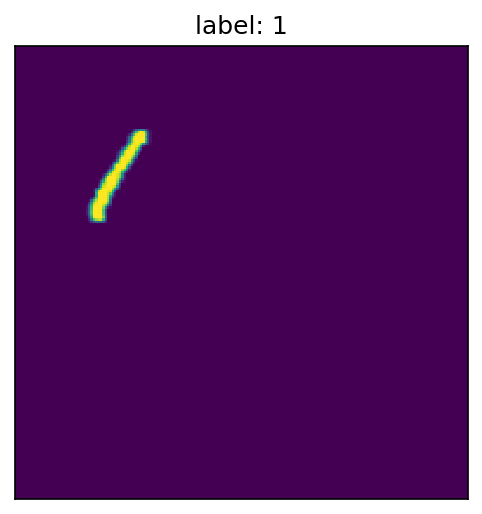

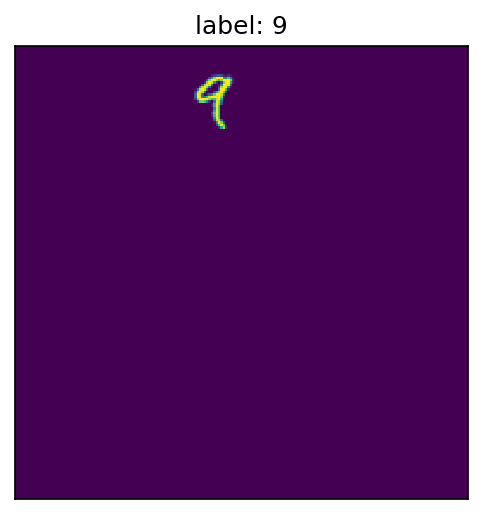

In [0]:
for i in range(5):
    show_img(img = X_train[i], label = y_train[i])

## preprocess data for experiement 2:
    random scaling and random location with gaussian noise
    

In [0]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = augment(X_train, add_noise=True)
X_test = augment(X_test, add_noise=True)



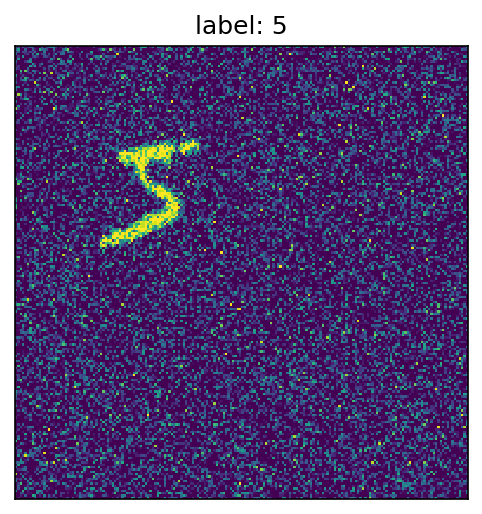

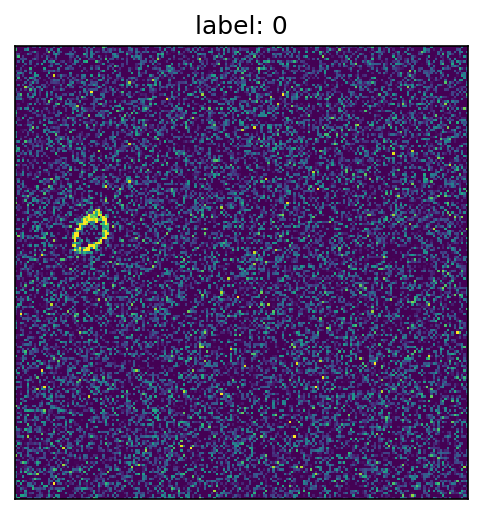

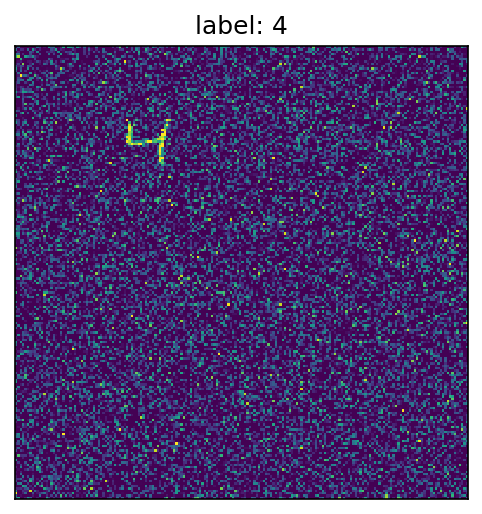

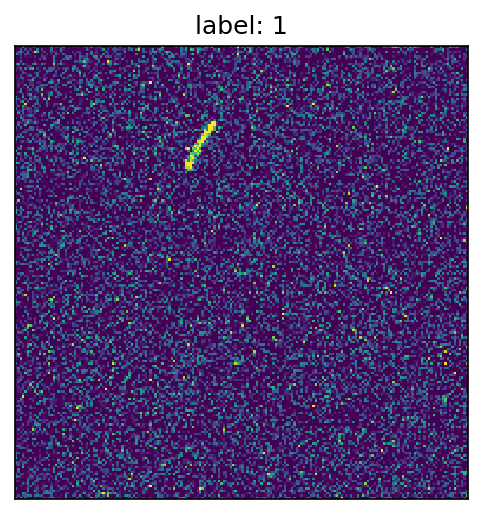

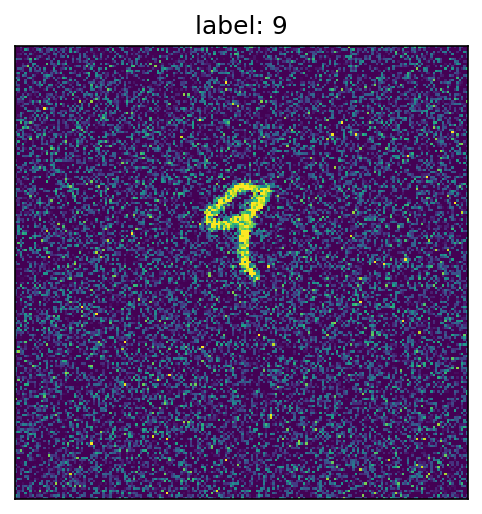

In [0]:
for i in range(5):
    show_img(img = X_train[i], label = y_train[i])

## preprocess data for experiement 3:
    random scaling and random location and permuting
    

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# random scaling and random location
X_train = augment(X_train, add_noise=False)
X_test = augment(X_test, add_noise=False)

# permute

# concatenate train and test image to the same list
X = np.concatenate((X_train, X_test), axis=0)

# permute all images by the same permutation
X = permute_pixels(X)

# split images into train and test sets
X_train = X[:60000]
X_test = X[60000:]



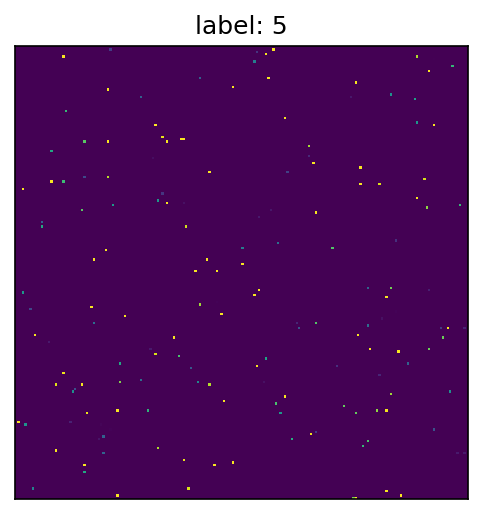

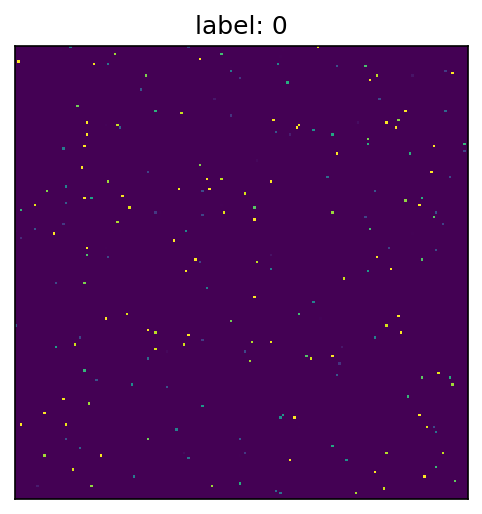

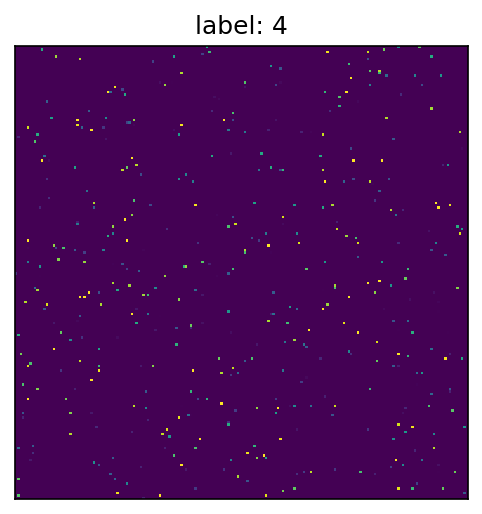

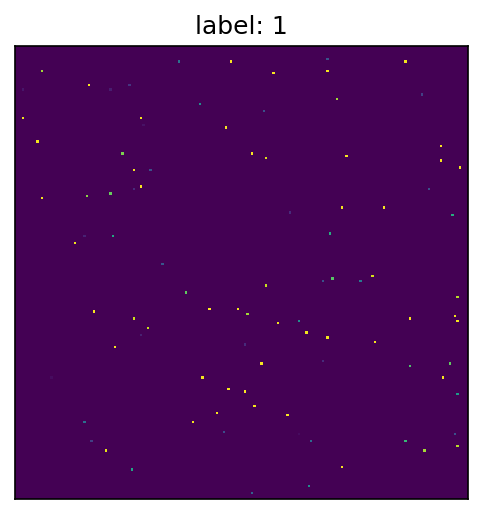

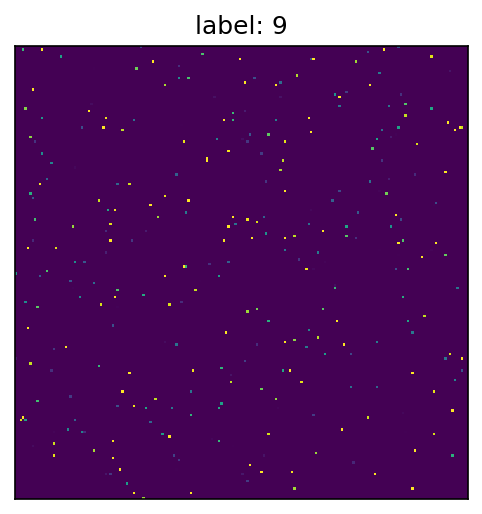

In [0]:
for i in range(5):
    show_img(img = X_train[i], label = y_train[i])

## preprocess data for experiement 4:
    random scaling and random location and permuting with gaussian noise
    

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# random scaling and random location and adding gaussian noise
X_train = augment(X_train, add_noise=True)
X_test = augment(X_test, add_noise=True)

# permute

# concatenate train and test image to the same list
X = np.concatenate((X_train, X_test), axis=0)

# permute all images by the same permutation
X = permute_pixels(X)

# split images into train and test sets
X_train = X[:60000]
X_test = X[60000:]

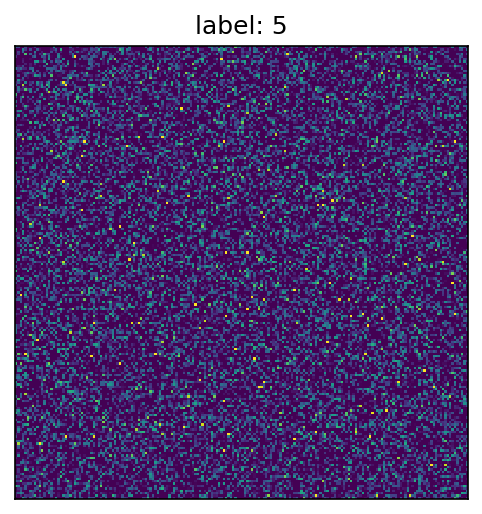

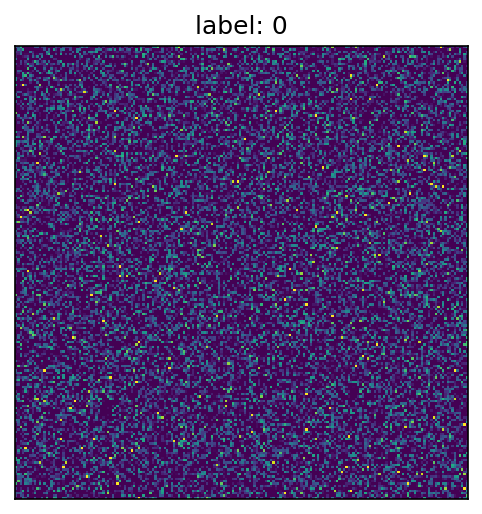

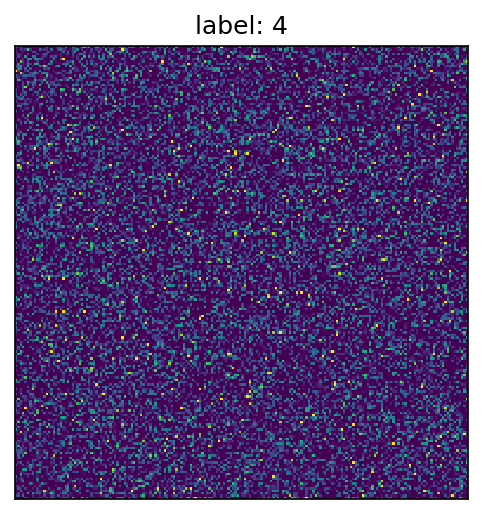

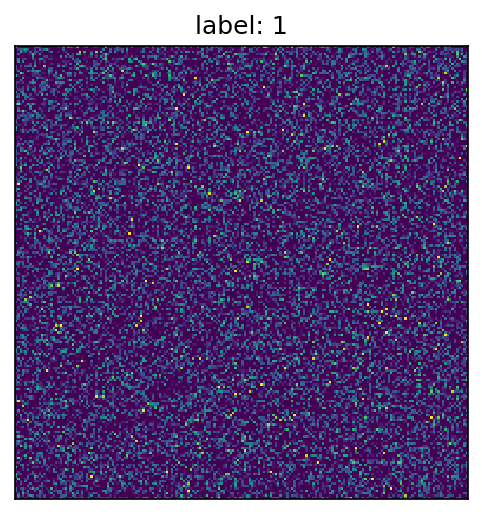

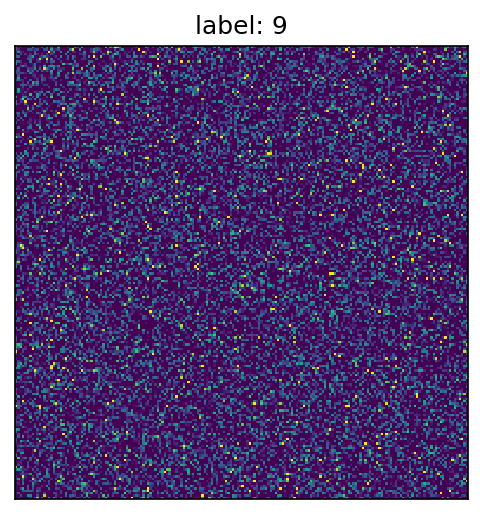

In [8]:
for i in range(5):
    show_img(img = X_train[i], label = y_train[i])

preprocess procedure applying to all experiments

In [0]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, size, size).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, size, size).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

#split test set to val and test set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, 
												random_state=0)

# one-hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_val = np_utils.to_categorical(y_val)

# Building model

In [9]:
print(tf.test.gpu_device_name())
K.set_image_dim_ordering('th')

/device:GPU:0


In [0]:
#@title configuration and hyperparameters
seed = 7 #@param {type:"integer"}

epoch_num = 20 #@param {type:"integer"}

batch_size = 256 #@param {type:"integer"}

optimizer = "adam" #@param {type:"string"}

np.random.seed(seed)


In [15]:
def build_model(opt="adam"):
	# create model
	model = Sequential()
	model.add(Conv2D(64, (5, 5), input_shape=(1, 192, 192), activation='relu'))
	model.add(AveragePooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.3))

	model.add(Conv2D(64, (5, 5), activation='relu'))
	model.add(AveragePooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.3))

	model.add(Conv2D(32, (5, 5), activation='relu'))
	model.add(AveragePooling2D(pool_size=(2, 2)))

	# model.add(Conv2D(32, (5, 5), activation='relu'))
	# model.add(MaxPooling2D(pool_size=(2, 2)))
	
	model.add(Flatten())
	model.add(Dropout(0.35))

	model.add(Dense(128, activation='relu', 
            kernel_regularizer=l2(0.)
        ))
	model.add(Dropout(0.3))
    
	model.add(Dense(10, activation='softmax', 
        kernel_regularizer=l2(0.)
        ))
	# Compile model
	model.compile(loss='categorical_crossentropy', 
					optimizer=opt, metrics=['accuracy'])
	return model

model = build_model(opt=optimizer)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 188, 188)      1664      
_________________________________________________________________
average_pooling2d_7 (Average (None, 64, 94, 94)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 64, 94, 94)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 90, 90)        102464    
_________________________________________________________________
average_pooling2d_8 (Average (None, 64, 45, 45)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 64, 45, 45)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 41, 41)        51232     
__________

# Training model

In [0]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), 
					epochs=epoch_num, 
					batch_size=batch_size, verbose=1)

# model.save_weights('weights.h5')


# Evaluation

In [0]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Baseline Error on test set: %.2f%%" % (100-scores[1]*100))

# write results to text file
# with open("Results_model_{}.{}_.txt".format(model_index, sub_index),"w") as f:
# 	f.write("***model_{}.{}***\n".format(model_index, sub_index))
# 	f.write("Accuracy: " + str(scores[1]))

In [0]:
# plot accuracy

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='lower right')
# plt.savefig('histories/model_acc_{}.{}_.png'.format(model_index, sub_index),bbox_inches='tight')
plt.show()

In [0]:
# plot loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper right')
# plt.savefig('histories/model_loss_{}.{}_.png'.format(model_index, sub_index),bbox_inches='tight')
plt.show()

# Results

Experiment 1 : accuracy 98.3%

Experiment 2 : accuracy 97.3%

Experiment 3 : accuracy 56.9%

Experiment 4 : accuracy 11.3%

# Conclusion

Convolutional neural nets are able to classify digits even with random scaling and random relocating.

Adding gaussian noise did make the task harder.

With pixel-wise permutation, CNN still can classify digits but with significantly worse performance.

With both permutation and gaussian noise, the model cannot do the task.